Aniqlik: 0.5
Confusion Matrix:
 [[0 1]
 [0 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



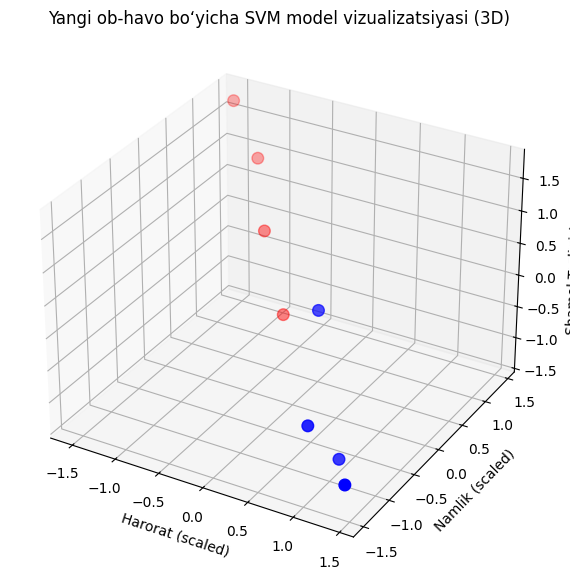

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# 1. Yangi ob-havo ma'lumotlari: [harorat, namlik, shamol_tezi]
X = np.array([
    [31, 42, 9],   # 0 - Quyoshli
    [26, 65, 13],  # 0
    [19, 88, 16],  # 1 - Yomg'ir
    [17, 92, 18],  # 1
    [29, 53, 8],   # 0
    [21, 78, 14],  # 1
    [23, 72, 11],  # 1
    [28, 49, 10],  # 0
])
y = np.array([0, 0, 1, 1, 0, 1, 1, 0])  # 0: yog'maydi, 1: yog'adi

# 2. Ma'lumotni standartlashtirish
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train/Testga ajratish
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# 4. SVM model yaratish va o'qitish
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# 5. Bashorat va aniqlikni baholash
y_pred = model.predict(X_test)

print("Aniqlik:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 6. Grafik: 3D visualizatsiya
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Ranglar (0 = ko‘k, 1 = qizil)
colors = ['blue' if label == 0 else 'red' for label in y]
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=colors, s=70)

ax.set_xlabel('Harorat (scaled)')
ax.set_ylabel('Namlik (scaled)')
ax.set_zlabel('Shamol Tezligi (scaled)')
ax.set_title('Yangi ob-havo bo‘yicha SVM model vizualizatsiyasi (3D)')

plt.show()
